In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.png')

In [5]:
img1.shape

(1200, 1800, 3)

In [6]:
img2.shape

(2400, 2393, 3)

In [7]:
img2 = cv2.resize(img2, (600,600))

In [9]:
img2.shape

(600, 600, 3)

In [10]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

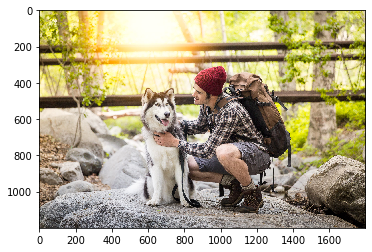

In [11]:
plt.imshow(img1)

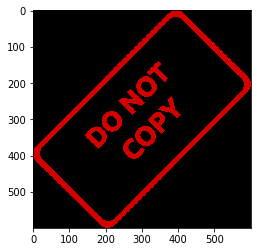

In [12]:
plt.imshow(img2)

In [18]:
x = 1800-600
y = 1200-600 


In [19]:
row, col, ch = img2.shape

In [20]:
row

600

In [21]:
col

600

In [22]:
ch

3

# region of interest

In [23]:
roi = img1[y:1200, x:1800]

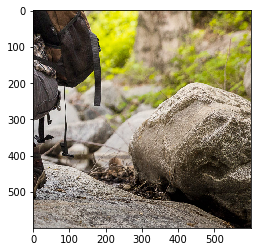

In [24]:
plt.imshow(roi)

In [25]:
roi.shape

(600, 600, 3)

# remove background

In [26]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

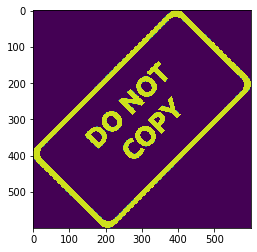

In [27]:
plt.imshow(img2_gray)

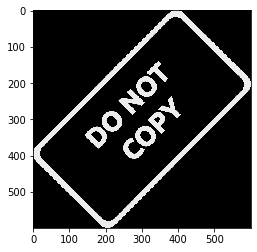

In [28]:
plt.imshow(img2_gray, cmap='gray')

In [29]:
mask_inv = cv2.bitwise_not(img2_gray)

In [30]:
mask_inv.shape

(600, 600)

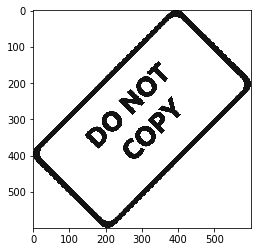

In [32]:
plt.imshow(mask_inv, cmap='gray')

In [33]:
import numpy as np

In [34]:
white_bg = np.full(img2.shape, 255, dtype=np.uint8)

In [35]:
bk = cv2.bitwise_or(white_bg, white_bg, mask=mask_inv)

In [36]:
bk.shape

(600, 600, 3)

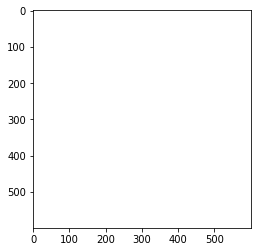

In [37]:
plt.imshow(bk)

In [38]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

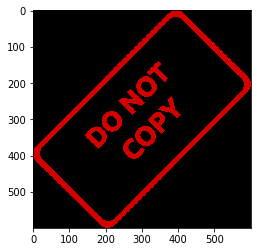

In [39]:
plt.imshow(fg)

In [40]:
fg.shape

(600, 600, 3)

In [41]:
final_roi = cv2.bitwise_or(roi, fg)

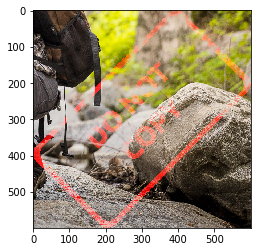

In [42]:
plt.imshow(final_roi)

In [43]:
large = img1
small = final_roi

In [44]:
large[y:y+small.shape[0], x:x+small.shape[1]] = small

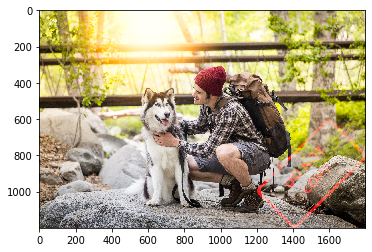

In [45]:
plt.imshow(large)